## Titanic prediction modeling

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Survived: 0 = No, 1 = Yes

- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

- sibsp: siblings / spouses aboard the Titanic

- parch: parents / children aboard the Titanic

- ticket: Ticket number

- cabin: Cabin number

- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

## plot relationship between survived feature and other feature

In [7]:
import matplotlib.pyplot as plt

In [8]:
df[df.Survived==1].shape

(342, 12)

In [9]:
df[df['Survived']==1].Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [10]:
df[df['Survived']==0].Sex.value_counts()

male      468
female     81
Name: Sex, dtype: int64

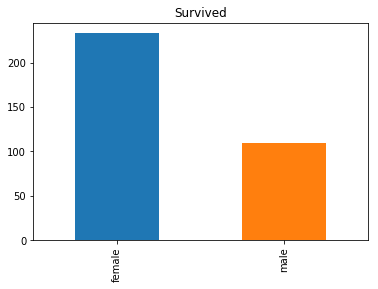

In [11]:
df[df['Survived']==1].Sex.value_counts().plot(kind='bar')
plt.title('Survived')
plt.show()

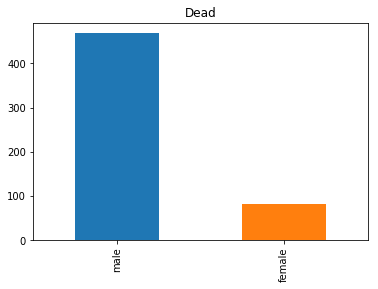

In [12]:
df[df['Survived']==0].Sex.value_counts().plot(kind='bar')
plt.title('Dead')
plt.show()

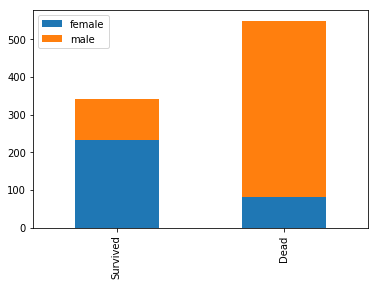

In [13]:
survived=df[df['Survived']==1].Sex.value_counts()
dead=df[df['Survived']==0].Sex.value_counts()
df_new = pd.DataFrame([survived,dead])
df_new.index = ['Survived','Dead']
df_new.plot(kind='bar',stacked=True)

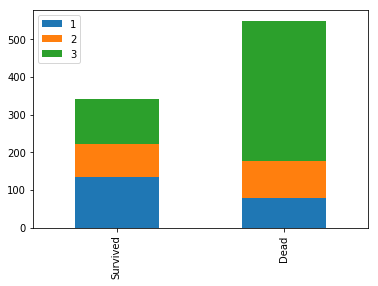

In [14]:
survived=df[df['Survived']==1].Pclass.value_counts()
dead=df[df['Survived']==0].Pclass.value_counts()
df_new = pd.DataFrame([survived,dead])
df_new.index = ['Survived','Dead']
df_new.plot(kind='bar',stacked=True)

#### 1st class more likely survivied than other classes

#### 3rd class more likely dead than other classes

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
df_1 = df.loc[:,['Pclass','Sex','Age','Fare']]

### label encoding
### one hot encoding

In [17]:
df_1.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [18]:
#f_1.Sex=df_1.Sex.map({"male": 0, "female": 1})  #label encoding
df_new = pd.get_dummies(df_1[df_1.columns])

In [19]:
df_new.head()

,Pclass,Age,Fare,Sex_female,Sex_male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [20]:
#df_1.head()

In [21]:
df_new.isnull().sum()


Pclass          0
Age           177
Fare            0
Sex_female      0
Sex_male        0
dtype: int64

In [22]:
print (df_new.Age.median())
print (df_new.Age.mean())

28.0
29.69911764705882


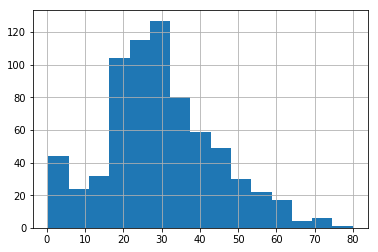

In [23]:
df_new.Age.hist(bins=15)

In [24]:
#df_1.Age.value_counts()

In [25]:
df_new.Age = df_new.Age.fillna(df_new.Age.median())

In [26]:
df_new.isnull().sum()

Pclass        0
Age           0
Fare          0
Sex_female    0
Sex_male      0
dtype: int64

In [27]:
X = df_new.values

In [28]:
y = df.Survived.values

In [29]:
X.shape

(891, 5)

In [30]:
y.shape

(891,)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log = LogisticRegression()
log.fit(x_train,y_train)
#C,penalty

C:\Users\Swati Malik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
log.score(x_test,y_test)

0.7757847533632287

### Confusion matrix

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [37]:
pred = log.predict(x_test)

In [38]:
confusion_matrix(y_test,pred)

array([[115,  24],
       [ 26,  58]], dtype=int64)

In [39]:
import numpy as np

In [40]:
np.bincount(y_test)

array([139,  84], dtype=int64)

In [41]:
from sklearn.metrics import roc_auc_score,recall_score

In [42]:
recall_score(y_test,pred)

0.6904761904761905

In [43]:

prob=[k[1] for k in log.predict_proba(x_test)]
roc_auc_score(y_test,prob)

0.862410071942446

In [44]:
test = pd.read_csv('dataset/test.csv')

In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
df_test = test.loc[:,['Pclass','Sex','Age','Fare']]

In [48]:
df_test.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [49]:
df_test.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [50]:
df_new_test = pd.get_dummies(df_test[df_test.columns])

In [51]:
df_new_test.head()

,Pclass,Age,Fare,Sex_female,Sex_male
0,3,34.5,7.8292,0,1
1,3,47.0,7.0000,1,0
2,2,62.0,9.6875,0,1
3,3,27.0,8.6625,0,1
4,3,22.0,12.2875,1,0


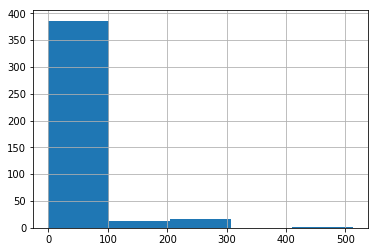

In [52]:
df_new_test.Fare.hist(bins=5)

In [53]:
df_new_test.Fare.mean()

35.6271884892086

In [54]:
df_new_test.Fare.median()

14.4542

In [60]:
df_new_test = df_new_test.fillna({'Age':df_new_test.Age.median(),
                                 'Fare':df_new_test.Fare.median()})

In [62]:
df_new_test.isnull().sum()

Pclass        0
Age           0
Fare          0
Sex_female    0
Sex_male      0
dtype: int64

In [63]:
t = log.predict(df_new_test.values)

In [64]:
t.size

418

In [65]:
t

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [67]:
t.size

418